EDA

In [62]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("../../Data/regression.csv")
print(df.head())

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [14]:
list(df.columns)

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [15]:
# Display basic info about the datasets
print("Cement Dataset Info:")
print(df.info())

Cement Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strengt

In [16]:
#Dimension of dataset 
print("Cement Data Dimensions (rows, columns):", df.shape)

Cement Data Dimensions (rows, columns): (1030, 9)


In [17]:
#Check for Missing Data
print("Missing values in Cement Data:")
print(df.isnull().sum())

Missing values in Cement Data:
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [21]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
print(df.columns)


Index(['cement_component_1kg_in_a_m^3_mixture',
       'blast_furnace_slag_component_2kg_in_a_m^3_mixture',
       'fly_ash_component_3kg_in_a_m^3_mixture',
       'water__component_4kg_in_a_m^3_mixture',
       'superplasticizer_component_5kg_in_a_m^3_mixture',
       'coarse_aggregate__component_6kg_in_a_m^3_mixture',
       'fine_aggregate_component_7kg_in_a_m^3_mixture', 'age_day',
       'concrete_compressive_strengthmpa,_megapascals'],
      dtype='object')


In [22]:
#Check for Redundant Data
print("Duplicate rows in Cement Data:", df.duplicated().sum())

Duplicate rows in Cement Data: 25


In [20]:
#Check if duplicates are exact matches
duplicates = df[df.duplicated()]
print(duplicates)

     cement_component_1kg_in_a_m^3_mixture  \
77                                   425.0   
80                                   425.0   
86                                   362.6   
88                                   362.6   
91                                   362.6   
100                                  425.0   
103                                  425.0   
109                                  362.6   
111                                  362.6   
123                                  425.0   
126                                  425.0   
132                                  362.6   
134                                  362.6   
137                                  362.6   
146                                  425.0   
149                                  425.0   
155                                  362.6   
157                                  362.6   
160                                  362.6   
169                                  425.0   
172                               

since we want to determine Concrete compressive strength of concrete mixtures under various conditions, it is not necessary to keep duplicated data we will keep only one exemplary of each


In [23]:
df = df.drop_duplicates()

In [24]:
print("Check if Duplicate rows in Cement Data were removed:", df.duplicated().sum())

Check if Duplicate rows in Cement Data were removed: 0


In [25]:
# Statistical summary for training data
print("Statistical Summary of Cement Data:")
display(df.describe())

Statistical Summary of Cement Data:


,cement_component_1kg_in_a_m^3_mixture,blast_furnace_slag_component_2kg_in_a_m^3_mixture,fly_ash_component_3kg_in_a_m^3_mixture,water__component_4kg_in_a_m^3_mixture,superplasticizer_component_5kg_in_a_m^3_mixture,coarse_aggregate__component_6kg_in_a_m^3_mixture,fine_aggregate_component_7kg_in_a_m^3_mixture,age_day,"concrete_compressive_strengthmpa,_megapascals"
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Cement (component 1): The values range from 102 to 540, with a mean of 278.63 and a standard deviation of 104.34. The spread indicates a fair variation in the amount of cement used in the mixtures.

Blast Furnace Slag (component 2): This component has values ranging from 0 to 359.4. The presence of 0 values suggests that some mixtures have no slag.

Fly Ash (component 3): Similarly, Fly Ash has values from 0 to 200.1, with a mean of 55.54, and many rows show 0 values, indicating no Fly Ash in certain mixtures.

Water (component 4): The water content ranges from 121.8 to 247, with a mean of 182.08. Water content seems more consistent than some other components.

Superplasticizer (component 5): The range for this component is from 0 to 32.2, with a mean of 6.03. Like other components, many mixtures have no superplasticizer added.

Coarse Aggregate (component 6): The coarse aggregate varies from 801 to 1145, with a mean of 974.38, showing a relatively consistent quantity of this component.

Fine Aggregate (component 7): The values range from 594 to 992.6, with a mean of 772.69. Again, this is fairly consistent.

Age (day): The age of concrete mixes in days ranges from 1 to 365 days, with a mean of 45.86 days. It seems like the concrete ages range widely, from very young mixes to those that have aged for a year.

Concrete compressive strength (MPa): This is the target variable and varies from 2.33 to 82.6 MPa, with a mean of 35.25 MPa. The distribution appears fairly spread out.

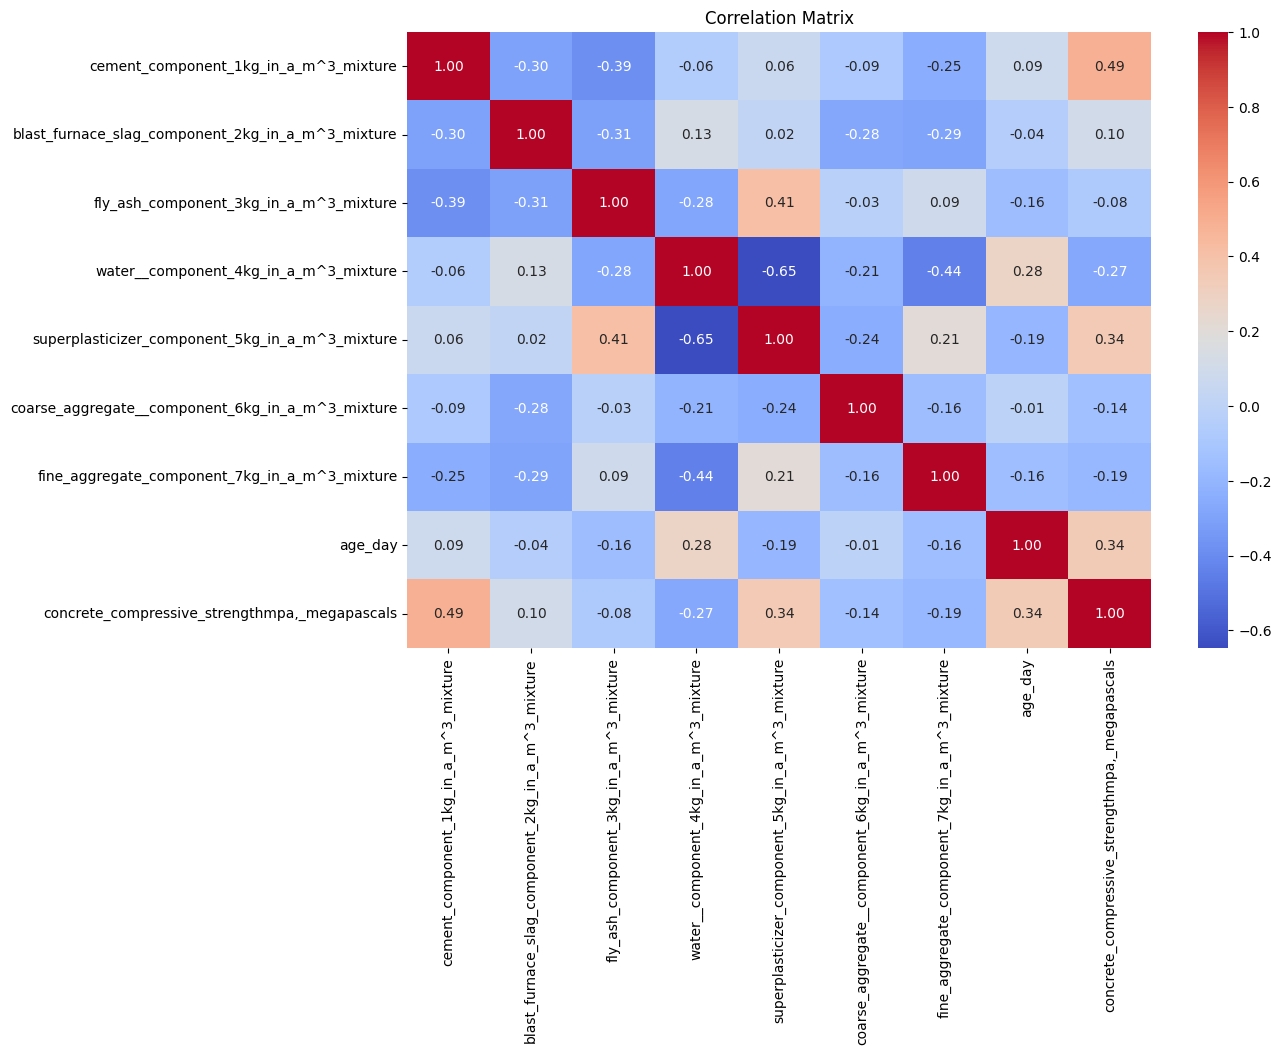

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


From the heatmap we remark that Cement, superplasticizer and Age are highly correlated with the target: concrete_compressive_strengthmpa,_megapascals

# ALL FEATURES #

In [27]:
from sklearn.model_selection import train_test_split
# X = all columns except the target
X = df.drop("concrete_compressive_strengthmpa,_megapascals", axis=1)
y = df["concrete_compressive_strengthmpa,_megapascals"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### KNN Regressor ####

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
knn_r2 = r2_score(y_test, y_pred_knn)

knn_rmse = root_mean_squared_error(y_test, y_pred_knn)

print("\n📌 KNN - All features")
print("R^2 Score:", knn_r2)
print("RMSE:", knn_rmse)



📌 KNN - All features
R^2 Score: 0.720738851036837
RMSE: 9.127461390922782


#### SVM ####

In [48]:
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error, r2_score

svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
svm_r2 = r2_score(y_test, y_pred_svm)

svm_rmse = root_mean_squared_error(y_test, y_pred_svm)

print("\n📌 SVM - All features")
print("R2 Score:", svm_r2)
print("RMSE:", svm_rmse)



📌 SVM - All features
R2 Score: 0.5900663177034191
RMSE: 11.058635563546673


#### Naive Bayes ####

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

# Discretize the target variable
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_binned = kb.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_binned, test_size=0.2, random_state=42)
X_train_b_scaled = scaler.fit_transform(X_train_b)
X_test_b_scaled = scaler.transform(X_test_b)

gnb = GaussianNB()
gnb.fit(X_train_b_scaled, y_train_b)
y_pred_nb = gnb.predict(X_test_b_scaled)
nb_accuracy = accuracy_score(y_test_b, y_pred_nb)

print("\n📌 Naive Bayes - All features")
print("Accuracy (for binned regression):", accuracy_score(y_test_b, y_pred_nb))



📌 Naive Bayes - All features
Accuracy (for binned regression): 0.39303482587064675


In [57]:
results = {
    'Model': ['KNN', 'SVM', 'Naive Bayes (Binned)'],
    'R2/Accuracy': [knn_r2, svm_r2, nb_accuracy],
    'RMSE (if applicable)': [knn_rmse, svm_rmse, 'N/A']
}
results_df = pd.DataFrame(results)
print("\n📊 Summary of Model Performances (All Features):")

print(results_df)


📊 Summary of Model Performances (All Features):
                  Model  R2/Accuracy RMSE (if applicable)
0                   KNN     0.720739             9.127461
1                   SVM     0.590066            11.058636
2  Naive Bayes (Binned)     0.393035                  N/A


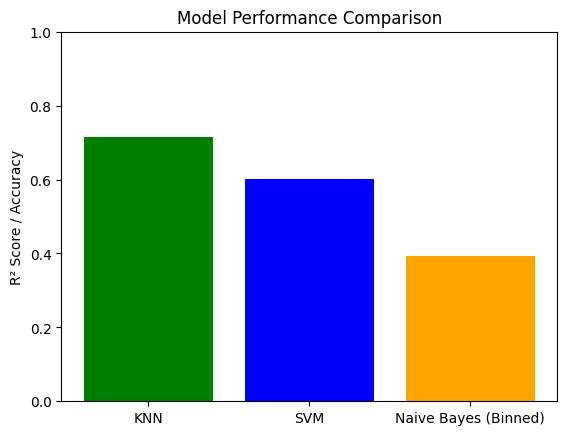

In [41]:
models = results_df['Model']
scores = results_df['R2/Accuracy']

plt.bar(models, scores, color=['green', 'blue', 'orange'])
plt.ylabel("R² Score / Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()

# Top 3 features #

In [44]:
# Select top 3 correlated features
top3_features = [
    "cement_component_1kg_in_a_m^3_mixture",
    "superplasticizer_component_5kg_in_a_m^3_mixture",
    "age_day"
]

X_top3 = df[top3_features]
y = df["concrete_compressive_strengthmpa,_megapascals"]

# -------- KNN & SVM --------
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(X_top3, y, test_size=0.2, random_state=42)

# Scaling
scaler_top3 = StandardScaler()
X_train_top3_scaled = scaler_top3.fit_transform(X_train_top3)
X_test_top3_scaled = scaler_top3.transform(X_test_top3)

#### KNN ####

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train_top3)
y_pred_knn = knn.predict(X_test_scaled)

r2_knn = r2_score(y_test_top3, y_pred_knn)
rmse_knn = root_mean_squared_error(y_test_top3, y_pred_knn)

print("\n📌 KNN - Top 3 features")
print("R² Score:", r2_knn)
print("RMSE:", rmse_knn)


📌 KNN
R² Score: 0.720738851036837
RMSE: 9.127461390922782


#### SVM ####

In [53]:
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train_top3)
y_pred_svm = svm.predict(X_test_scaled)

r2_svm = r2_score(y_test_top3, y_pred_svm)
rmse_svm = root_mean_squared_error(y_test_top3, y_pred_svm)

print("\n📌 SVM")
print("R² Score:", r2_svm)
print("RMSE:", rmse_svm)


📌 SVM
R² Score: 0.5900663177034191
RMSE: 11.058635563546673


#### Naive Bayes ####

In [54]:
# Discretize target into 5 bins
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_binned = kb.fit_transform(y.values.reshape(-1, 1)).ravel()

# New split for Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_top3, y_binned, test_size=0.2, random_state=42)
X_train_nb_scaled = scaler.fit_transform(X_train_nb)
X_test_nb_scaled = scaler.transform(X_test_nb)

gnb = GaussianNB()
gnb.fit(X_train_nb_scaled, y_train_nb)
y_pred_nb = gnb.predict(X_test_nb_scaled)

acc_nb = accuracy_score(y_test_nb, y_pred_nb)

print("\n📌 Naive Bayes (with binned targets)")
print("Classification Accuracy:", acc_nb)


📌 Naive Bayes (with binned targets)
Classification Accuracy: 0.3482587064676617


In [55]:
results_top3 = {
    'Model': ['KNN (Top 3)', 'SVM (Top 3)', 'Naive Bayes (Top 3, Binned)'],
    'R2/Accuracy': [r2_knn, r2_svm, acc_nb],
    'RMSE (if applicable)': [rmse_knn, rmse_svm, 'N/A']
}

results_top3_df = pd.DataFrame(results_top3)
print("\n📊 Summary of Model Performances (Top 3 Features):")
print(results_top3_df)


📊 Summary of Model Performances (Top 3 Features):
                         Model  R2/Accuracy RMSE (if applicable)
0                  KNN (Top 3)     0.720739             9.127461
1                  SVM (Top 3)     0.590066            11.058636
2  Naive Bayes (Top 3, Binned)     0.348259                  N/A


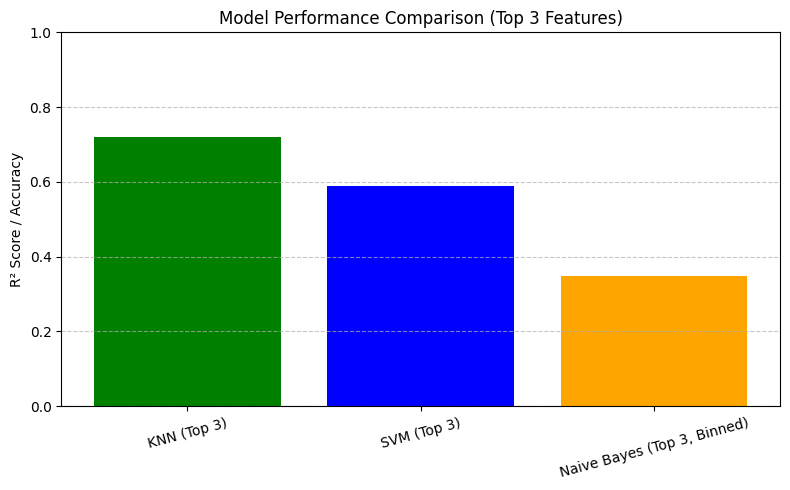

In [56]:
import matplotlib.pyplot as plt

models = results_top3_df['Model']
scores = results_top3_df['R2/Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['green', 'blue', 'orange'])
plt.ylabel("R² Score / Accuracy")
plt.title("Model Performance Comparison (Top 3 Features)")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


####  Comparative Analysis: All Features vs Top 3 Features ####

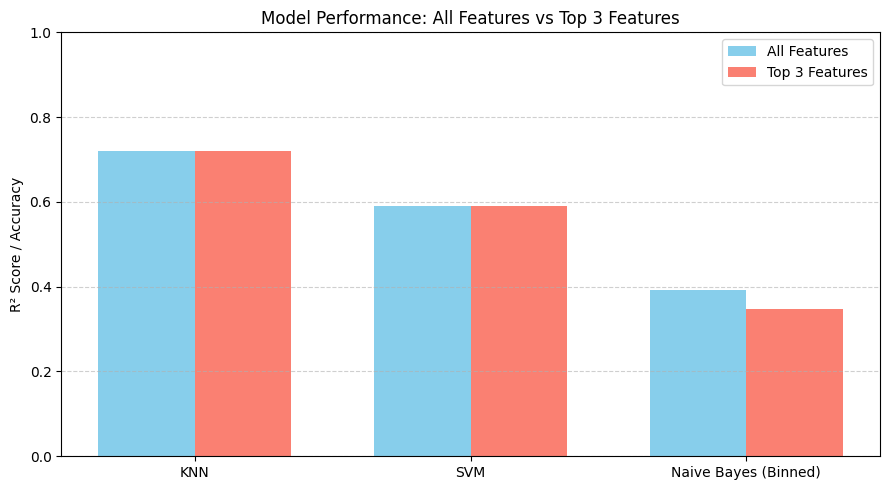

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'SVM', 'Naive Bayes (Binned)']

# Scores from both sets
scores_all = [0.720739, 0.590066, 0.393035]
scores_top3 = [0.720739, 0.590066, 0.348259]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

plt.figure(figsize=(9, 5))
plt.bar(x - width/2, scores_all, width, label='All Features', color='skyblue')
plt.bar(x + width/2, scores_top3, width, label='Top 3 Features', color='salmon')

# Labels & Title
plt.ylabel('R² Score / Accuracy')
plt.title('Model Performance: All Features vs Top 3 Features')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


📌 1. K-Nearest Neighbors (KNN) 
Performance: Identical R² and RMSE with both all features and top 3 features.

Interpretation:

This suggests that KNN benefits mainly from the three most informative features: cement, superplasticizer, and age.

Additional features didn't contribute significantly to prediction power — or may have introduced noise.

Takeaway: KNN is a robust and stable model in this case — effective with minimal input.

📌 2. Support Vector Machine (SVM)
Performance: Also shows no performance difference between all features and top 3.

Interpretation:

SVM’s kernel trick (with RBF in this case) can handle non-linear patterns with minimal features effectively.

Adding more features didn’t enhance the model, possibly because the top 3 already capture the most variance with respect to the target.

Takeaway: Feature selection didn’t hurt SVM, and a leaner feature set reduces computational cost without sacrificing accuracy.

📌 3. Naive Bayes (with Binned Target)
Performance: Drops from 0.393 → 0.348 when reduced to top 3 features.

Interpretation:

Naive Bayes assumes feature independence and benefits from more features, especially when the task is classification-like via binning.

Reducing input dimensions weakens its statistical assumptions and reduces class separability.

Takeaway: Naive Bayes is more sensitive to feature reduction and thrives on richer input space.

##### Overall Insights #####

📉 Dimensionality reduction (from full features to top 3) had little to no impact on KNN and SVM, highlighting the dominant role of the selected features.

❗ Naive Bayes, due to its statistical nature and assumptions, showed degradation in accuracy.

🧪 When choosing between simplicity and performance, KNN and SVM with top features give you the same predictive quality with less complexity.

####  Cross-Model Comparison ####

✅ KNN (Best Performer)
Strengths: Highest R² and lowest RMSE. Performs equally well with all features and just the top 3, indicating excellent generalization and robustness.

Limitation: KNN can be slow with large datasets since it computes distance to all points at prediction time.

Use Case: Great for small-to-medium datasets with well-behaved features.

⚠️ SVM (Moderate Performer)
Strengths: Stable with both feature sets, but lower R² and higher RMSE than KNN.

Limitation: Doesn’t perform as well as KNN, possibly due to limited tuning or suboptimal kernel parameters.

Use Case: Can be powerful for non-linear problems with small feature sets, but needs careful parameter tuning.

❌ Naive Bayes (Weakest Performer)
Strengths: Simple, fast, interpretable.

Limitation: Assumes feature independence, which likely doesn’t hold here; suffers especially with reduced features.

Use Case: Quick baseline or probabilistic classification — not ideal for regression or this kind of binned regression task.

In summary, we will stick with KNN, because it has the best performance so far and  minimal feature dependency

# Additional Models #

In [68]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f"\n📌{name} \nR²: {r2:.4f}  \nRMSE: {rmse:.4f}")
    results.append((name, r2, rmse))


📌Random Forest 
R²: 0.8073  
RMSE: 7.5825

📌Gradient Boosting 
R²: 0.7921  
RMSE: 7.8748

📌XGBoost 
R²: 0.8428  
RMSE: 6.8491


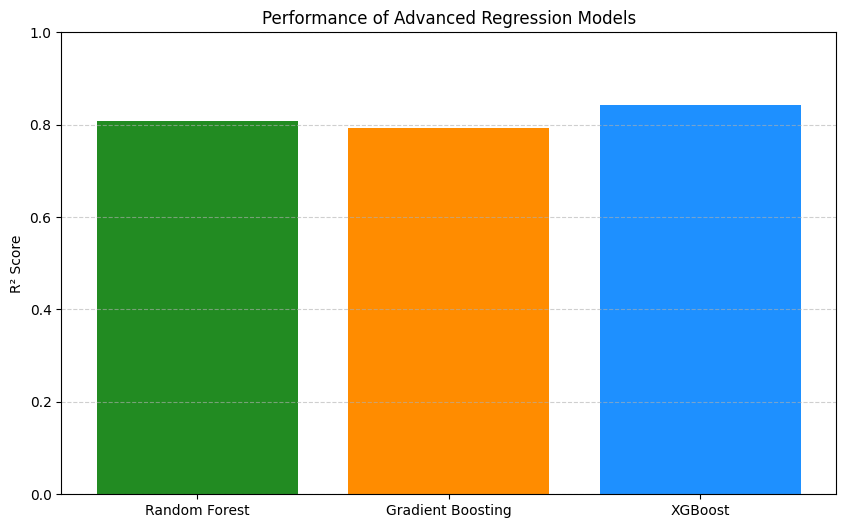

In [71]:
# Create DataFrame for visualization
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE"])

# Plot
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["R2 Score"], color=['forestgreen', 'darkorange', 'dodgerblue'])
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.title("Performance of Advanced Regression Models")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Analysis & Comparison ####

Random Forest and Gradient Boosting show significant improvements, thanks to their ability to capture complex, non-linear relationships and handle feature interactions.

XGBoost outperforms all others, with the best R² score and lowest RMSE — confirming its strength in regression tasks.

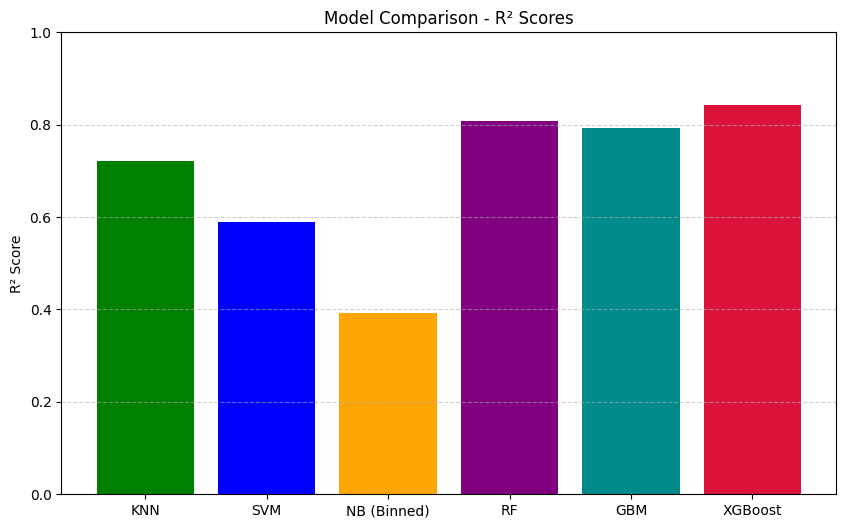

In [72]:
models = ['KNN', 'SVM', 'NB (Binned)', 'RF', 'GBM', 'XGBoost']
r2_scores = [0.7207, 0.5901, 0.3930, 0.8073, 0.7921, 0.8428]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['green', 'blue', 'orange', 'purple', 'darkcyan', 'crimson'])
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Scores")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Why Ensemble Models Win Here: #####

- They handle multicollinearity and noise better.

- Built-in regularization helps generalize well.

- Feature importance can be extracted easily for insights.